In [1]:
#Importing the necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pypl 
import seaborn as sd

In [2]:
# For viewing all columns

pd.set_option('display.max_columns', None)

# 1. Data Cleaning

In [3]:
region_states_df = pd.read_csv('State_Region_corrected.csv')

region_states_df.head()

,State / Union territory (UT),Area (km2),Region,National Share (%)
0,Rajasthan,342239,Northern,10.55
1,Madhya Pradesh,308350,Central,9.37
2,Maharashtra,307713,Western,9.36
3,Uttar Pradesh,240928,Northern,7.33
4,Gujarat,196024,Western,5.96


In [4]:
region_states_df.shape

(34, 4)

In [5]:
power_df = pd.read_csv('power_generation.csv')
power_df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [6]:
power_df.shape

(4945, 9)

In [7]:
power_df['Region'].unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

In [8]:
region_states_df['Region'].unique()


array(['Northern', 'Central', 'Western', 'Southern', 'Eastern',
       'Northeastern'], dtype=object)

In [50]:
region_states_df = region_states_df.replace('Northeastern','NorthEastern')

### Checking for null values

In [51]:
region_states_df.isnull().sum()

State             0
Area              0
Region            0
National Share    0
dtype: int64

In [52]:
power_df.isnull().sum()

index                           0
Date                            0
Region                          0
Thermal Generation Actual       0
Thermal Generation Estimated    0
Nuclear Generation Actual       0
Nuclear Generation Estimated    0
Hydro Generation Actual         0
Hydro Generation Estimated      0
Year                            0
dtype: int64

### There are NaN values in the Nuclear Generation columns

In [53]:
power_df.groupby(by=['Region']).sum()

,index,Thermal Generation Actual,Thermal Generation Estimated,Nuclear Generation Actual,Nuclear Generation Estimated,Hydro Generation Actual,Hydro Generation Estimated,Year
Region,,,,,,,,
Eastern,2158427,482123.72,468831.45,0.00,0.00,48686.62,52461.95,1996324
NorthEastern,2159416,32115.79,33105.95,0.00,0.00,17612.32,14058.66,1996324
Northern,2155460,655048.26,602168.52,26964.08,31378.94,188854.16,201204.03,1996324
Southern,2157438,610753.56,543828.71,55855.21,46483.24,71109.34,77083.80,1996324
Western,2156449,1206631.65,1197394.22,27678.34,31880.85,36235.34,35180.02,1996324


### Nuclear Generation columns are empty for Eastern and NorthEastern region. Could be due to no nuclear plants in that region. Replacing the NaN values with 0


In [54]:
power_df = power_df.fillna(0)

In [55]:
power_df.isnull().sum()

index                           0
Date                            0
Region                          0
Thermal Generation Actual       0
Thermal Generation Estimated    0
Nuclear Generation Actual       0
Nuclear Generation Estimated    0
Hydro Generation Actual         0
Hydro Generation Estimated      0
Year                            0
dtype: int64

### Calculating the sum and mean of the power generations per region

In [56]:
power_df.groupby(by=['Region'],as_index=False).sum()

,Region,index,Thermal Generation Actual,Thermal Generation Estimated,Nuclear Generation Actual,Nuclear Generation Estimated,Hydro Generation Actual,Hydro Generation Estimated,Year
0,Eastern,2158427,482123.72,468831.45,0.00,0.00,48686.62,52461.95,1996324
1,NorthEastern,2159416,32115.79,33105.95,0.00,0.00,17612.32,14058.66,1996324
2,Northern,2155460,655048.26,602168.52,26964.08,31378.94,188854.16,201204.03,1996324
3,Southern,2157438,610753.56,543828.71,55855.21,46483.24,71109.34,77083.80,1996324
4,Western,2156449,1206631.65,1197394.22,27678.34,31880.85,36235.34,35180.02,1996324


In [57]:
power_df.groupby(by=['Region']).mean()

,index,Thermal Generation Actual,Thermal Generation Estimated,Nuclear Generation Actual,Nuclear Generation Estimated,Hydro Generation Actual,Hydro Generation Estimated,Year
Region,,,,,,,,
Eastern,2182.433771,487.486067,474.045956,0.000000,0.000000,49.228129,53.045450,2018.527806
NorthEastern,2183.433771,32.472993,33.474166,0.000000,0.000000,17.808210,14.215025,2018.527806
Northern,2179.433771,662.333933,608.866047,27.263984,31.727947,190.954661,203.441891,2018.527806
Southern,2181.433771,617.546572,549.877361,56.476451,47.000243,71.900243,77.941153,2018.527806
Western,2180.433771,1220.052224,1210.712053,27.986188,32.235440,36.638362,35.571304,2018.527806


In [58]:
power_df.dtypes

index                                    int64
Date                            datetime64[ns]
Region                                  object
Thermal Generation Actual              float64
Thermal Generation Estimated           float64
Nuclear Generation Actual              float64
Nuclear Generation Estimated           float64
Hydro Generation Actual                float64
Hydro Generation Estimated             float64
Year                                     int64
dtype: object

### Renaming column names for better clarity

In [59]:
states_colname = {'State / Union territory (UT)':'State',
                 'Area (km2)':'Area',
                 'National Share (%)':'National Share'}

power_colname = {'Thermal Generation Actual (in MU)':'Thermal Generation Actual',
                 'Thermal Generation Estimated (in MU)':'Thermal Generation Estimated',
                 'Nuclear Generation Actual (in MU)':'Nuclear Generation Actual',
                 'Nuclear Generation Estimated (in MU)':'Nuclear Generation Estimated',
                 'Hydro Generation Actual (in MU)':'Hydro Generation Actual',
                 'Hydro Generation Estimated (in MU)':'Hydro Generation Estimated'}

region_states_df = region_states_df.rename(columns=states_colname)
power_df = power_df.rename(columns=power_colname)

### Converting thermal generation values to float

In [60]:
power_df['Thermal Generation Actual'] = power_df['Thermal Generation Actual'].str.replace(',','')
power_df['Thermal Generation Estimated'] = power_df['Thermal Generation Estimated'].str.replace(',','')

AttributeError: Can only use .str accessor with string values!

In [ ]:
power_df['Thermal Generation Actual'] = power_df['Thermal Generation Actual'].astype(np.float64)
power_df['Thermal Generation Estimated'] = power_df['Thermal Generation Estimated'].astype(np.float64)

### Coverting the date values to DateTime format

In [61]:
power_df['Date'] = pd.to_datetime(power_df['Date'])

# 2. Data Exploration

## 2.1 Number and names of states and union territories in each region


In [65]:
region_states_df.groupby(by=['Region'])['State'].count()

Region
Central          2
Eastern          4
NorthEastern     8
Northern        10
Southern         6
Western          4
Name: State, dtype: int64

In [66]:
region_states_df.groupby(by=['Region'])['State'].agg(['unique'])

,unique
Region,
Central,"[Madhya Pradesh, Chhattisgarh]"
Eastern,"[Odisha, Bihar, West Bengal, Jharkhand]"
NorthEastern,"[Arunachal Pradesh, Assam, Meghalaya, Manipur,..."
Northern,"[Rajasthan, Uttar Pradesh, Ladakh, Himachal Pr..."
Southern,"[Karnataka, Andhra Pradesh, Tamil Nadu, Telang..."
Western,"[Maharashtra, Gujarat, Goa, Dadra and Nagar Ha..."


## 2.2 Mean power generation in India, both actual and estimated

In [67]:
mean_power = power_df.groupby(by='Date',as_index=False).mean()
mean_power

,Date,index,Thermal Generation Actual,Thermal Generation Estimated,Nuclear Generation Actual,Nuclear Generation Estimated,Hydro Generation Actual,Hydro Generation Estimated,Year
0,2017-09-01,2.0,555.582,506.478,23.652,17.836,113.484,99.538,2017.0
1,2017-09-02,7.0,555.582,512.674,23.652,18.456,113.484,99.128,2017.0
2,2017-09-03,12.0,555.554,506.646,23.652,18.514,113.484,94.610,2017.0
3,2017-09-04,17.0,555.554,542.856,23.652,18.524,113.484,100.072,2017.0
4,2017-09-05,22.0,558.170,555.930,23.652,18.542,113.484,94.032,2017.0
...,...,...,...,...,...,...,...,...,...
984,2020-07-28,287.0,592.326,597.208,26.216,17.864,105.154,117.900,2020.0
985,2020-07-29,292.0,592.326,583.772,26.216,18.056,105.154,113.962,2020.0
986,2020-07-30,297.0,594.872,576.776,26.216,17.128,105.154,113.956,2020.0
987,2020-07-31,302.0,596.800,588.622,26.216,17.134,105.154,115.826,2020.0


## 2.3 Plotting a graph of all the types of power gernerations in all of India, with total power generation

In [68]:
power_actcols = mean_power.loc[:,['Date','Thermal Generation Actual','Nuclear Generation Actual','Hydro Generation Actual']]
power_actcols['Total Generation Actual'] = power_actcols.iloc[:,1:3].mean(axis=1)

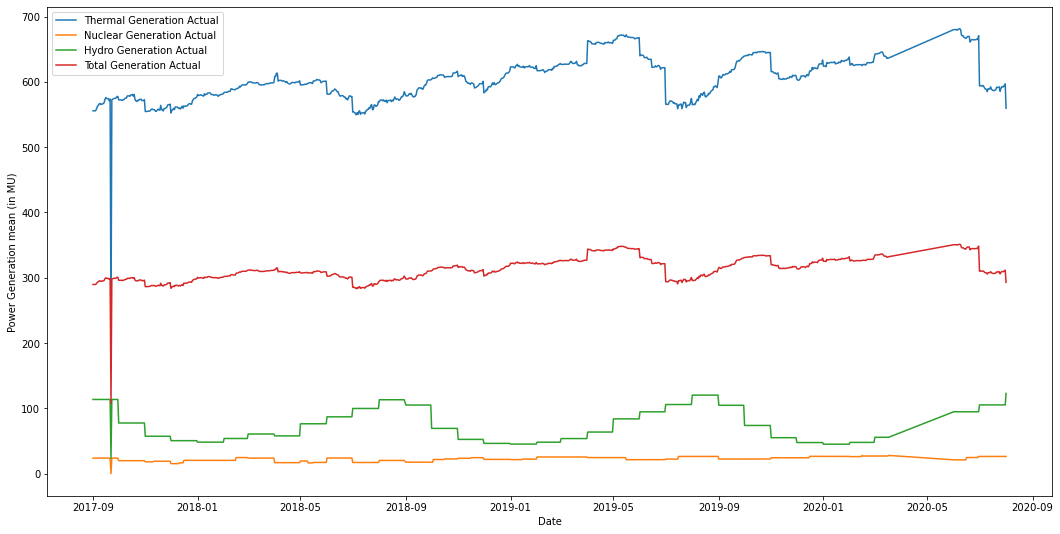

In [69]:
pypl.figure(figsize=(18,9))
#power_actcols.plot(x='Date',y='Total Actual Generation')

pypl.plot(power_actcols['Date'],power_actcols['Thermal Generation Actual'],label='Thermal Generation Actual')
pypl.plot(power_actcols['Date'],power_actcols['Nuclear Generation Actual'],label='Nuclear Generation Actual')
pypl.plot(power_actcols['Date'],power_actcols['Hydro Generation Actual'],label='Hydro Generation Actual')
pypl.plot(power_actcols['Date'],power_actcols['Total Generation Actual'],label='Total Generation Actual')

pypl.xlabel('Date')
pypl.ylabel('Power Generation mean (in MU)')

pypl.legend()

### As we can see from the above graph, Thermal Generation is widespread all over India

## 2.4 Actual Power vs Estimated Power

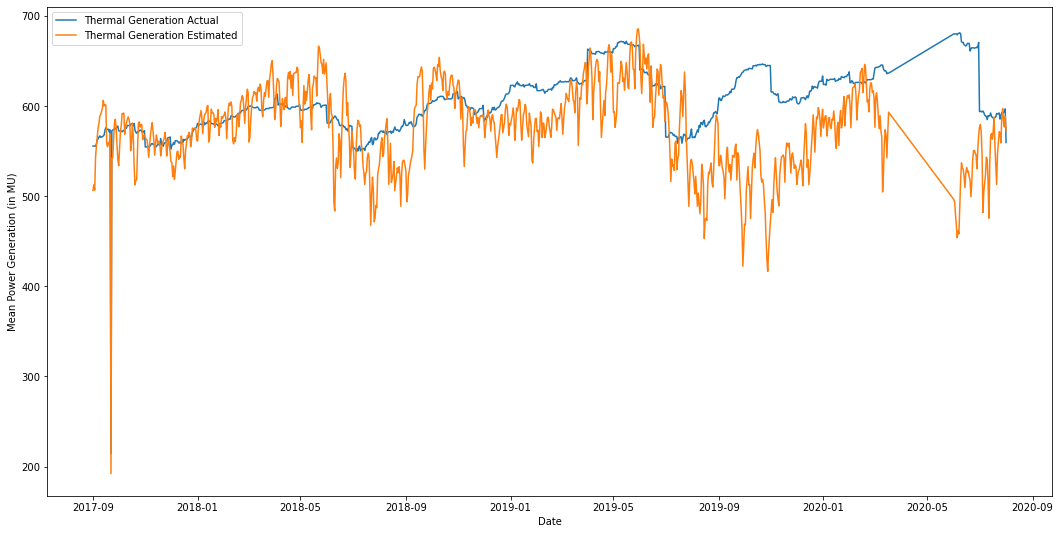

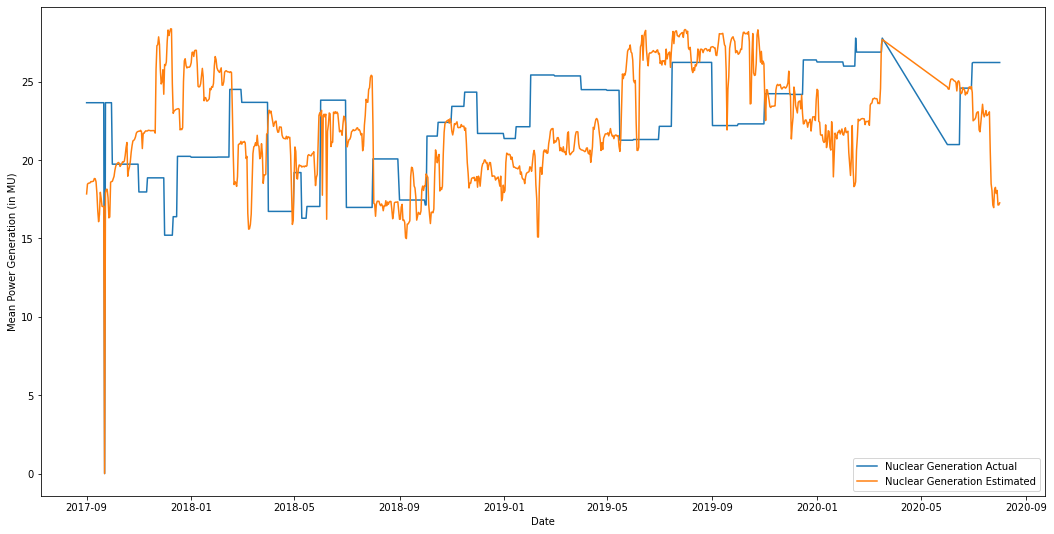

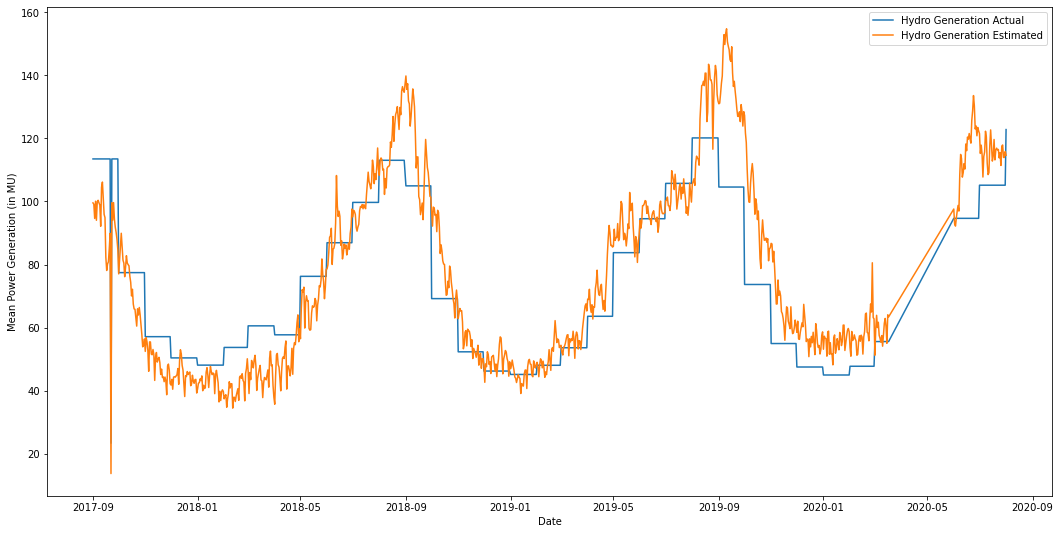

In [70]:
actual_power = ['Thermal Generation Actual','Nuclear Generation Actual','Hydro Generation Actual']
estimate_power = ['Thermal Generation Estimated','Nuclear Generation Estimated','Hydro Generation Estimated']

for idx,num in enumerate(actual_power): 
    #print(num)
    pypl.figure(figsize=(18,9))
    pypl.plot(mean_power['Date'],mean_power[actual_power[idx]],label=actual_power[idx])
    pypl.plot(mean_power['Date'],mean_power[estimate_power[idx]],label=estimate_power[idx])
    pypl.xlabel('Date')
    pypl.ylabel('Mean Power Generation (in MU)')
    pypl.legend()
    pypl.show()
#sd.lineplot(x='Date',y='Nuclear Generation Estimated',hue='Region',data=power_df)

### Thermal and Nuclear Power seems to have fluctuations in generation, but actual and estimated values for hydro trail each other well

## 2.5 Regions that uses the most of all power generators

In [71]:
mean_power_per_region = power_df.groupby(by=['Date','Region'],as_index=False).mean()
mean_power_per_region

,Date,Region,index,Thermal Generation Actual,Thermal Generation Estimated,Nuclear Generation Actual,Nuclear Generation Estimated,Hydro Generation Actual,Hydro Generation Estimated,Year
0,2017-09-01,Eastern,3.0,441.02,429.39,0.00,0.00,85.94,69.36,2017.0
1,2017-09-01,NorthEastern,4.0,29.11,15.91,0.00,0.00,24.64,21.21,2017.0
2,2017-09-01,Northern,0.0,624.23,484.21,30.36,35.57,273.27,320.81,2017.0
3,2017-09-01,Southern,2.0,576.66,578.55,62.73,49.80,111.57,64.78,2017.0
4,2017-09-01,Western,1.0,1106.89,1024.33,25.17,3.81,72.00,21.53,2017.0
...,...,...,...,...,...,...,...,...,...,...
4940,2020-08-01,Eastern,308.0,482.86,547.03,0.00,0.00,87.22,93.78,2020.0
4941,2020-08-01,NorthEastern,309.0,34.42,32.81,0.00,0.00,29.87,29.96,2020.0
4942,2020-08-01,Northern,305.0,669.47,602.96,26.88,23.41,348.72,351.98,2020.0
4943,2020-08-01,Southern,307.0,494.66,415.53,61.83,26.28,93.49,77.25,2020.0


### Hydro Generataion

<AxesSubplot:xlabel='Date', ylabel='Hydro Generation Actual'>

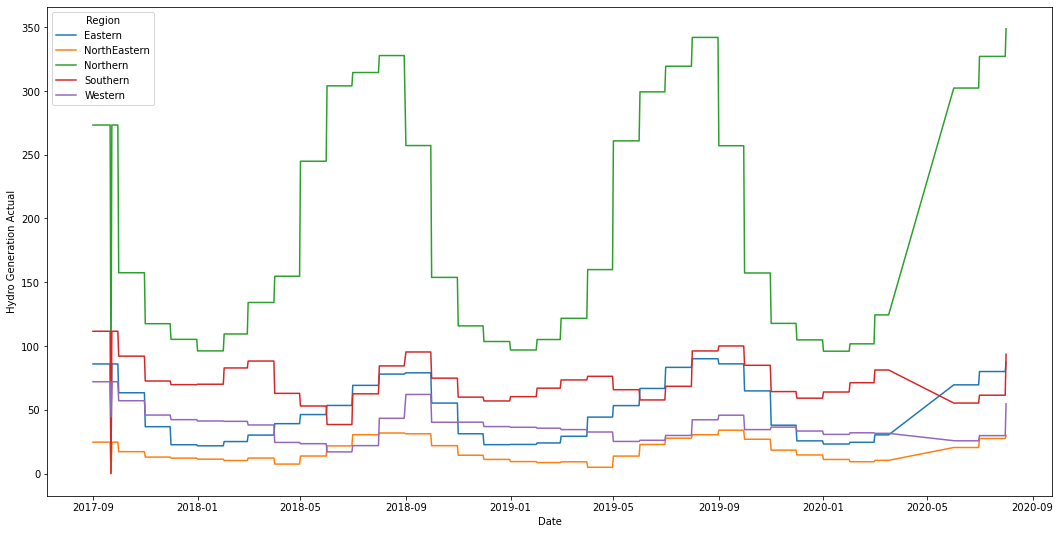

In [72]:
pypl.figure(figsize=(18,9))
sd.lineplot(x='Date',y='Hydro Generation Actual',hue='Region',data=mean_power_per_region)

### Nuclear Generation

<AxesSubplot:xlabel='Date', ylabel='Nuclear Generation Actual'>

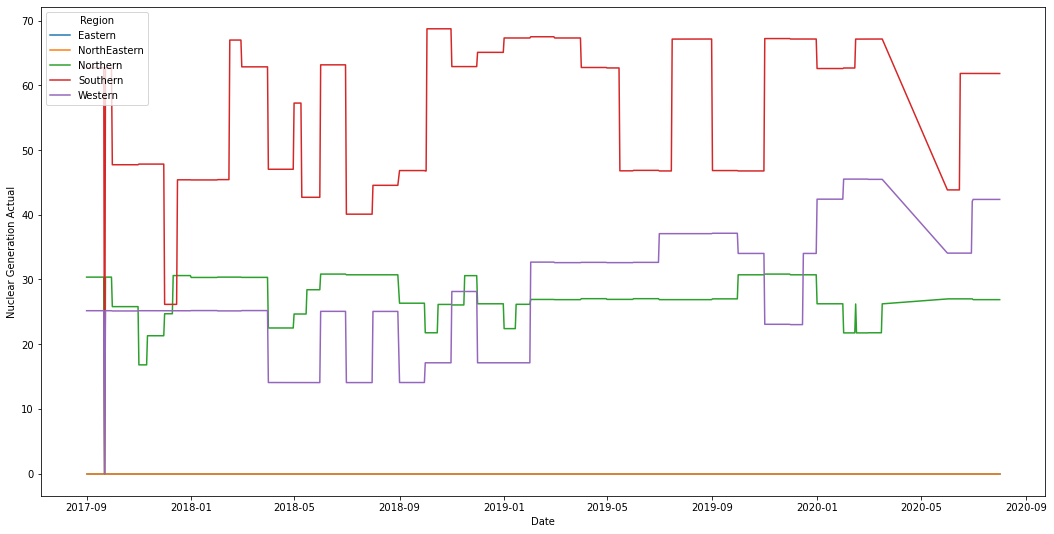

In [73]:
pypl.figure(figsize=(18,9))
sd.lineplot(x='Date',y='Nuclear Generation Actual',hue='Region',data=mean_power_per_region)

### Thermal Generation

<AxesSubplot:xlabel='Date', ylabel='Thermal Generation Actual'>

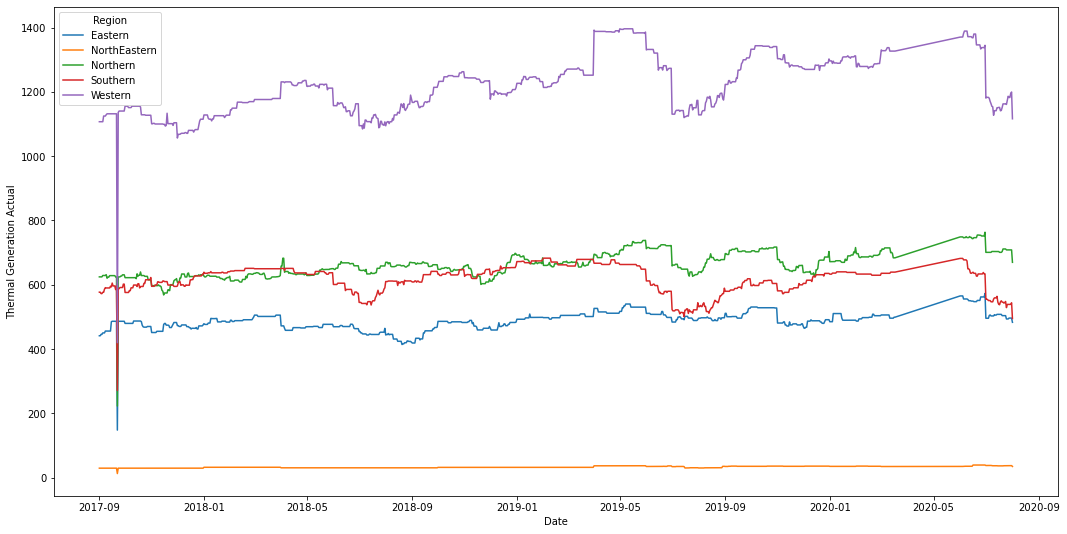

In [74]:
pypl.figure(figsize=(18,9))
sd.lineplot(x='Date',y='Thermal Generation Actual',hue='Region',data=mean_power_per_region)

### From the following graphs, the northern, southern and western regions uses the thermal,nuclear and hydro energy the most, respectively, over last 3 years


## 2.6 Searching for outliers

<AxesSubplot:title={'center':'Thermal Generation Actual'}, xlabel='Region'>

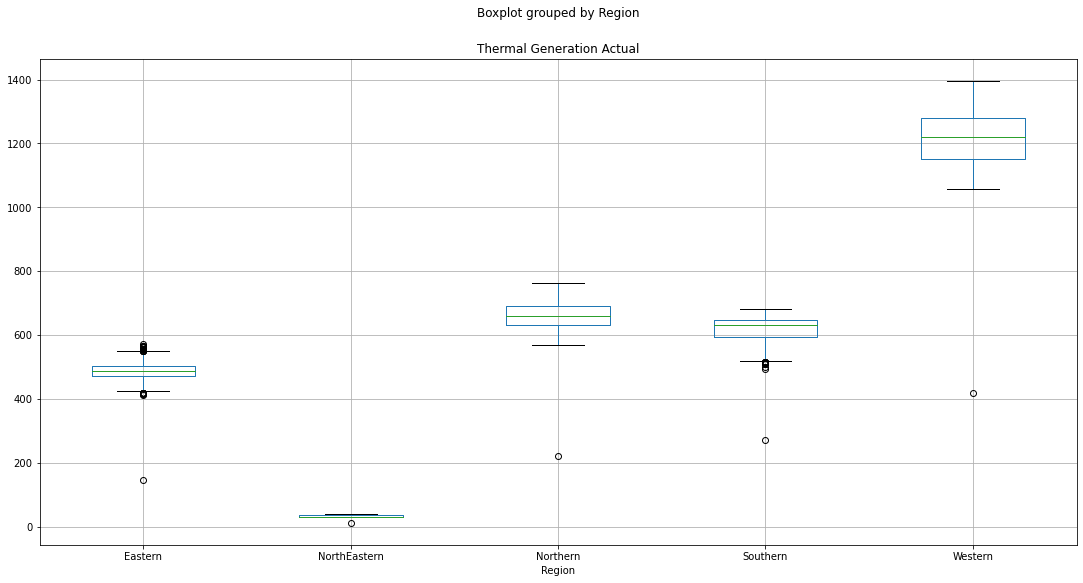

In [32]:
mean_power_per_region.boxplot(by='Region',column=['Thermal Generation Actual'],figsize=(18,9))

<AxesSubplot:title={'center':'Nuclear Generation Actual'}, xlabel='Region'>

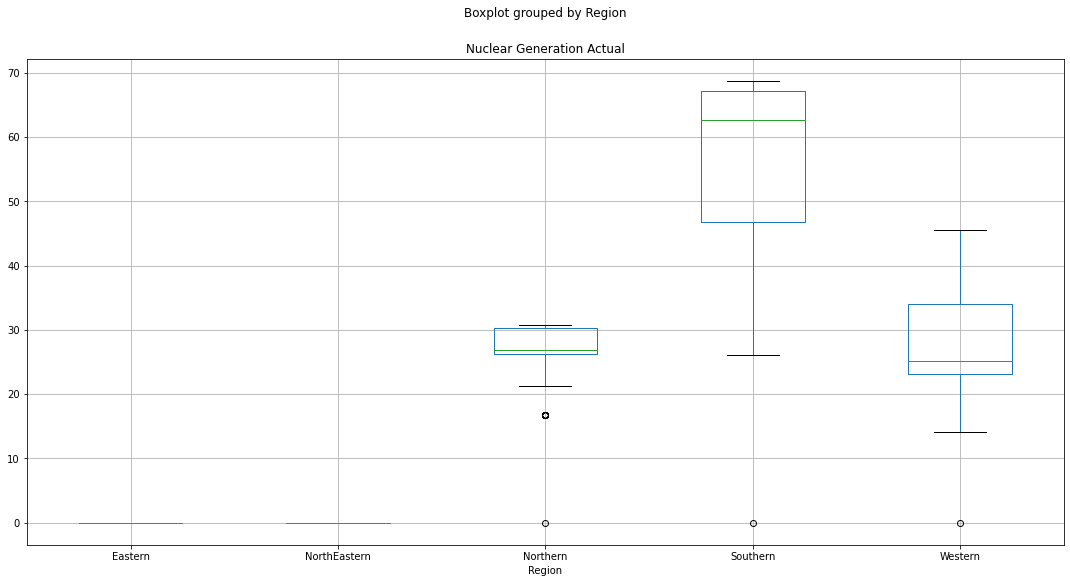

In [33]:
mean_power_per_region.boxplot(by='Region',column=['Nuclear Generation Actual'],figsize=(18,9))

<AxesSubplot:title={'center':'Hydro Generation Actual'}, xlabel='Region'>

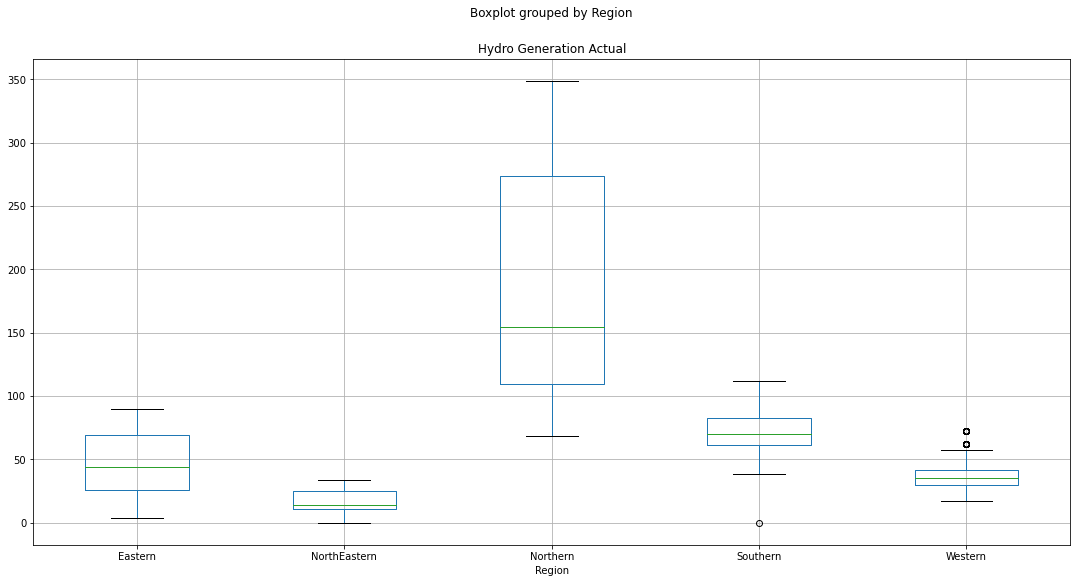

In [75]:
mean_power_per_region.boxplot(by='Region',column=['Hydro Generation Actual'],figsize=(18,9))

### As we can see from the box plots, Nuclear Power has less outliers

## 2.7 Bar charts of the regions that uses the most power generator

<AxesSubplot:xlabel='Region', ylabel='Thermal Generation Actual'>

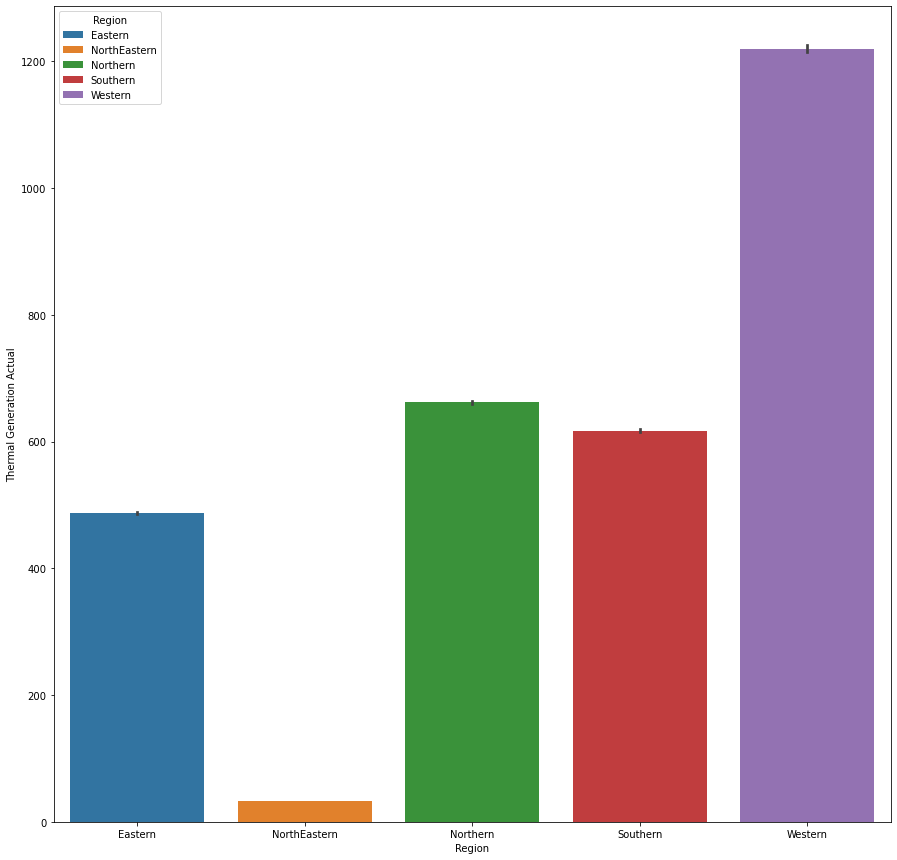

In [35]:
pypl.figure(figsize=(15,15))
sd.barplot(x='Region',y='Thermal Generation Actual',hue='Region',data=mean_power_per_region,dodge=False)

<AxesSubplot:xlabel='Region', ylabel='Hydro Generation Actual'>

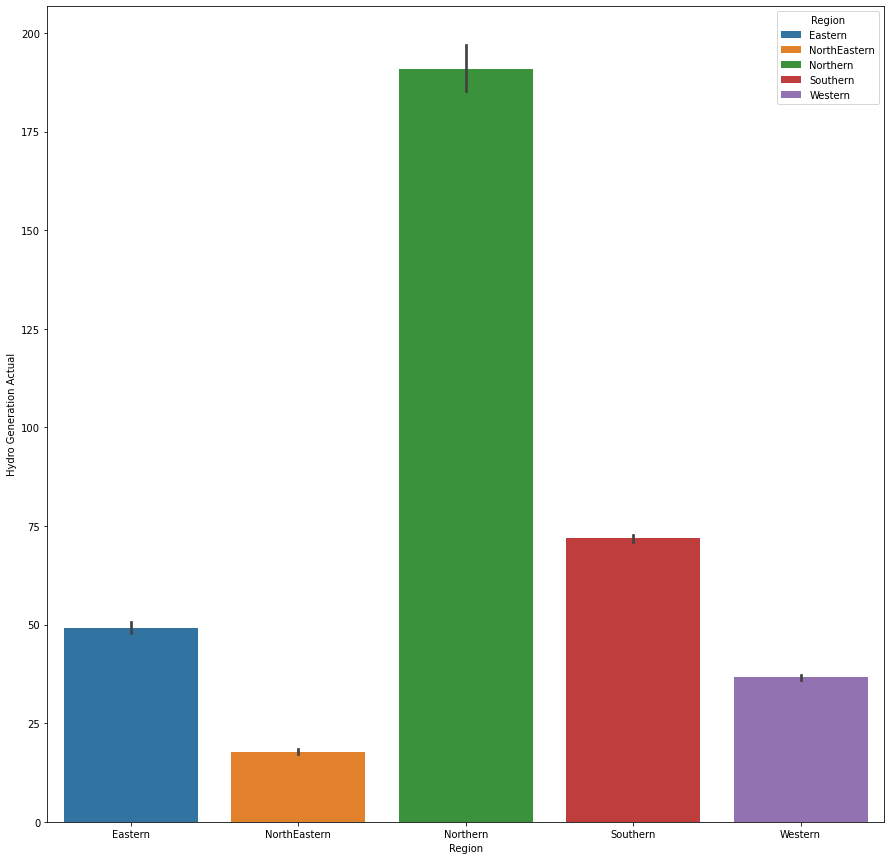

In [36]:
pypl.figure(figsize=(15,15))
sd.barplot(x='Region',y='Hydro Generation Actual',hue='Region',data=mean_power_per_region,dodge=False)

<AxesSubplot:xlabel='Region', ylabel='Nuclear Generation Actual'>

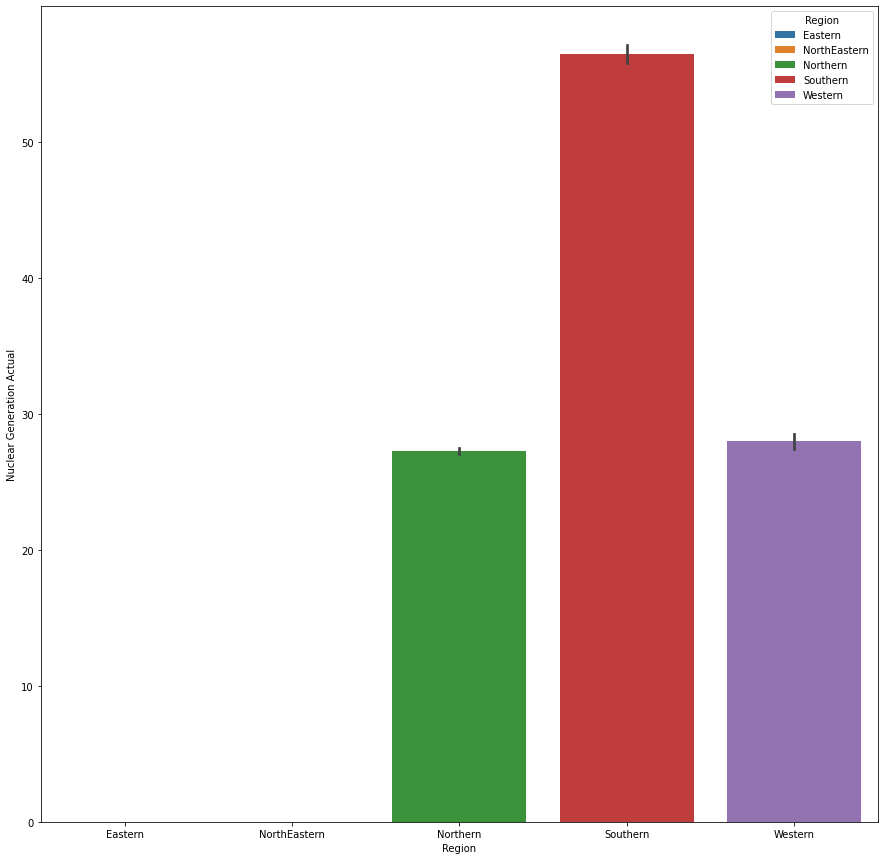

In [37]:
pypl.figure(figsize=(15,15))
sd.barplot(x='Region',y='Nuclear Generation Actual',hue='Region',data=mean_power_per_region,dodge=False)

## 2.8 Power usage per area

In [38]:
power_share = region_states_df.groupby(by='Region',as_index=False).sum()
power_share

,Region,Area,National Share
0,Central,443541,13.480
1,Eastern,418336,12.710
2,NorthEastern,262179,7.940
3,Northern,889881,27.193
4,Southern,636251,19.330
5,Western,508042,15.440


In [39]:
power_copy = power_df
power_copy['Year'] = power_copy['Date'].dt.year
power_copy.drop('Date',axis=1)

,index,Region,Thermal Generation Actual,Thermal Generation Estimated,Nuclear Generation Actual,Nuclear Generation Estimated,Hydro Generation Actual,Hydro Generation Estimated,Year
0,0,Northern,624.23,484.21,30.36,35.57,273.27,320.81,2017
1,1,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,2017
2,2,Southern,576.66,578.55,62.73,49.80,111.57,64.78,2017
3,3,Eastern,441.02,429.39,0.00,0.00,85.94,69.36,2017
4,4,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21,2017
...,...,...,...,...,...,...,...,...,...
4940,305,Northern,669.47,602.96,26.88,23.41,348.72,351.98,2020
4941,306,Western,1116.00,1262.10,42.37,36.63,54.67,20.28,2020
4942,307,Southern,494.66,415.53,61.83,26.28,93.49,77.25,2020
4943,308,Eastern,482.86,547.03,0.00,0.00,87.22,93.78,2020


In [40]:
power_mean_year = power_copy.groupby(by=['Region'],as_index=False).mean()
power_mean_year = power_mean_year[['Region','Thermal Generation Actual','Nuclear Generation Actual','Hydro Generation Actual']]
power_mean_year

,Region,Thermal Generation Actual,Nuclear Generation Actual,Hydro Generation Actual
0,Eastern,487.486067,0.000000,49.228129
1,NorthEastern,32.472993,0.000000,17.808210
2,Northern,662.333933,27.263984,190.954661
3,Southern,617.546572,56.476451,71.900243
4,Western,1220.052224,27.986188,36.638362


In [41]:
pdx = pd.merge(power_share,power_mean_year,how='outer')
pdx = pdx[pdx.Region != 'Central']

In [42]:
pdx['Thermal per km2'] = (pdx['Thermal Generation Actual']/pdx['Area'])
pdx['Nuclear per km2'] = (pdx['Nuclear Generation Actual']/pdx['Area'])
pdx['Hydro per km2'] = (pdx['Hydro Generation Actual']/pdx['Area'])

In [43]:
pdx

,Region,Area,National Share,Thermal Generation Actual,Nuclear Generation Actual,Hydro Generation Actual,Thermal per km2,Nuclear per km2,Hydro per km2
1,Eastern,418336,12.710,487.486067,0.000000,49.228129,0.001165,0.000000,0.000118
2,NorthEastern,262179,7.940,32.472993,0.000000,17.808210,0.000124,0.000000,0.000068
3,Northern,889881,27.193,662.333933,27.263984,190.954661,0.000744,0.000031,0.000215
4,Southern,636251,19.330,617.546572,56.476451,71.900243,0.000971,0.000089,0.000113
5,Western,508042,15.440,1220.052224,27.986188,36.638362,0.002401,0.000055,0.000072


In [44]:
pdx_melt = pd.melt(pdx,id_vars=['Region'],value_vars=['Thermal per km2','Nuclear per km2','Hydro per km2'])
pdx_melt

,Region,variable,value
0,Eastern,Thermal per km2,0.001165
1,NorthEastern,Thermal per km2,0.000124
2,Northern,Thermal per km2,0.000744
3,Southern,Thermal per km2,0.000971
4,Western,Thermal per km2,0.002401
5,Eastern,Nuclear per km2,0.000000
6,NorthEastern,Nuclear per km2,0.000000
7,Northern,Nuclear per km2,0.000031
8,Southern,Nuclear per km2,0.000089
9,Western,Nuclear per km2,0.000055


<AxesSubplot:xlabel='Region', ylabel='value'>

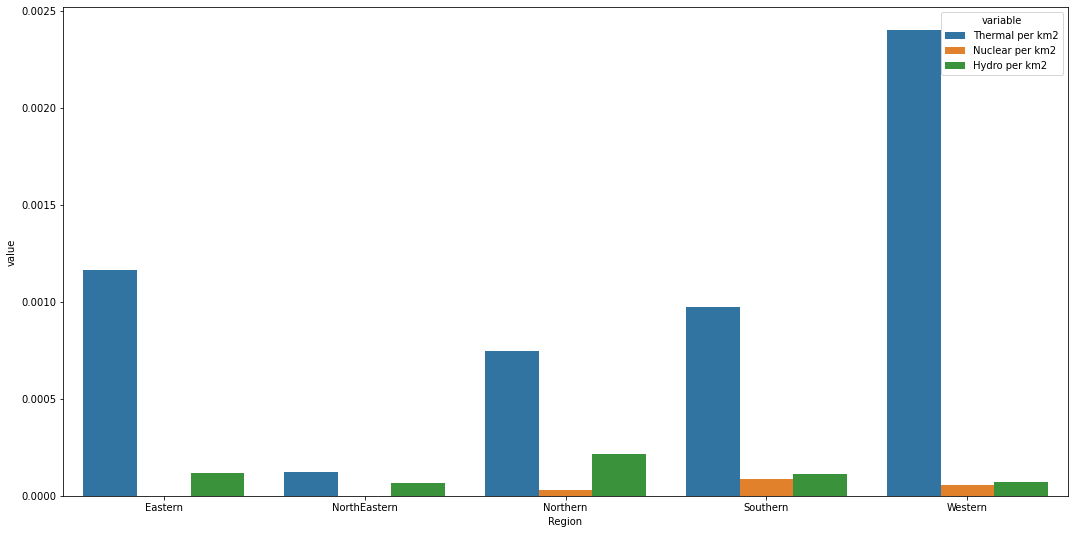

In [45]:
pypl.figure(figsize=(18,9))
sd.barplot(x='Region',y='value',hue='variable',data=pdx_melt)

# 3. Linear Regression (for Hydro Generation)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.linear_model import LinearRegression

## 3.1 Making the dataframe for training and testing data¶

In [109]:
mean_hydro = mean_power[['Hydro Generation Estimated','Hydro Generation Actual']]
mean_hydro

,Hydro Generation Estimated,Hydro Generation Actual
0,99.538,113.484
1,99.128,113.484
2,94.610,113.484
3,100.072,113.484
4,94.032,113.484
...,...,...
984,117.900,105.154
985,113.962,105.154
986,113.956,105.154
987,115.826,105.154


## 3.2 Removing all outliers that might disturb with the model

In [110]:
q1 = mean_hydro['Hydro Generation Actual'].quantile(0.25)
q3 = mean_hydro['Hydro Generation Actual'].quantile(0.75)
iqr = q3-q1

minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)

mean_hydro = mean_hydro.drop(mean_hydro[(mean_hydro['Hydro Generation Actual'] < minimum) | (mean_hydro['Hydro Generation Actual'] > maximum)].index)

In [85]:
q1 = mean_hydro['Hydro Generation Estimated'].quantile(0.25)
q3 = mean_hydro['Hydro Generation Estimated'].quantile(0.75)
iqr = q3-q1

minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)

mean_hydro = mean_hydro.drop(mean_hydro[(mean_hydro['Hydro Generation Estimated'] < minimum) | (mean_hydro['Hydro Generation Estimated'] > maximum)].index)

<AxesSubplot:>

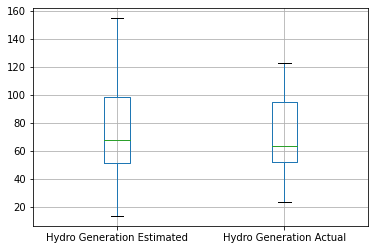

In [86]:
mean_hydro.boxplot()

## 3.3 Creating the training and testing data for linear regression

In [95]:
x = mean_hydro[['Hydro Generation Estimated']].values
y = mean_hydro[['Hydro Generation Actual']].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
linreg = LinearRegression()
model = linreg.fit(x_train,y_train)

In [97]:
y_pred = model.predict(x_test)

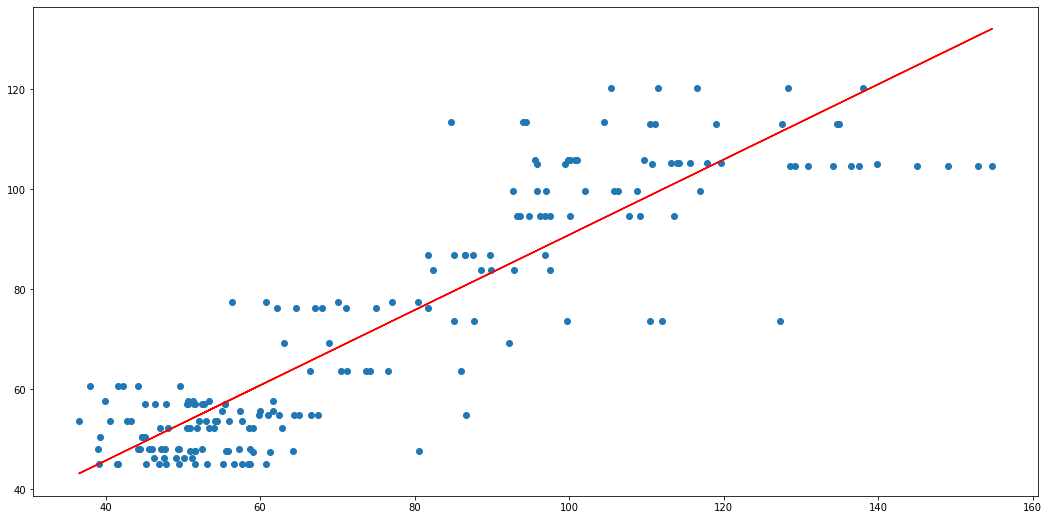

In [98]:
pypl.figure(figsize=(18,9))

pypl.scatter(x_test,y_test)
pypl.plot(x_test,y_pred,color='r')

In [99]:
f'Training score : {linreg.score(x_train,y_train)}'

'Training score : 0.8045683939079786'

In [100]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)

print(f'Test score : {score}')

Test score : 0.7924985669078575


In [101]:
f'Slope : {model.coef_}'

'Slope : [[0.75180713]]'

In [103]:
f'Intercept : {model.intercept_}'

'Intercept : [15.66058414]'

# 4. Linear Regression (for Thermal Generation)

## 4.1 Making the dataframe for training and testing data¶

In [113]:
mean_thermal = mean_power[['Thermal Generation Estimated','Thermal Generation Actual']]
mean_thermal

,Thermal Generation Estimated,Thermal Generation Actual
0,506.478,555.582
1,512.674,555.582
2,506.646,555.554
3,542.856,555.554
4,555.930,558.170
...,...,...
984,597.208,592.326
985,583.772,592.326
986,576.776,594.872
987,588.622,596.800


## 4.2 Removing all outliers that might disturb with the model

In [115]:
q1 = mean_thermal['Thermal Generation Actual'].quantile(0.25)
q3 = mean_thermal['Thermal Generation Actual'].quantile(0.75)
iqr = q3-q1

minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)

mean_thermal = mean_thermal.drop(mean_thermal[(mean_thermal['Thermal Generation Actual'] < minimum) | (mean_thermal['Thermal Generation Actual'] > maximum)].index)

In [116]:
q1 = mean_thermal['Thermal Generation Estimated'].quantile(0.25)
q3 = mean_thermal['Thermal Generation Estimated'].quantile(0.75)
iqr = q3-q1

minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)

mean_thermal = mean_thermal.drop(mean_thermal[(mean_thermal['Thermal Generation Estimated'] < minimum) | (mean_thermal['Thermal Generation Estimated'] > maximum)].index)

<AxesSubplot:>

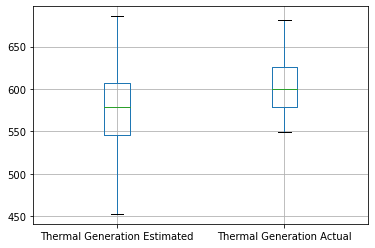

In [117]:
mean_thermal.boxplot()

## 4.3 Creating the training and testing data for linear regression

In [119]:
x = mean_thermal[['Thermal Generation Estimated']].values
y = mean_thermal[['Thermal Generation Actual']].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
linreg = LinearRegression()
model = linreg.fit(x_train,y_train)

In [121]:
y_pred = model.predict(x_test)

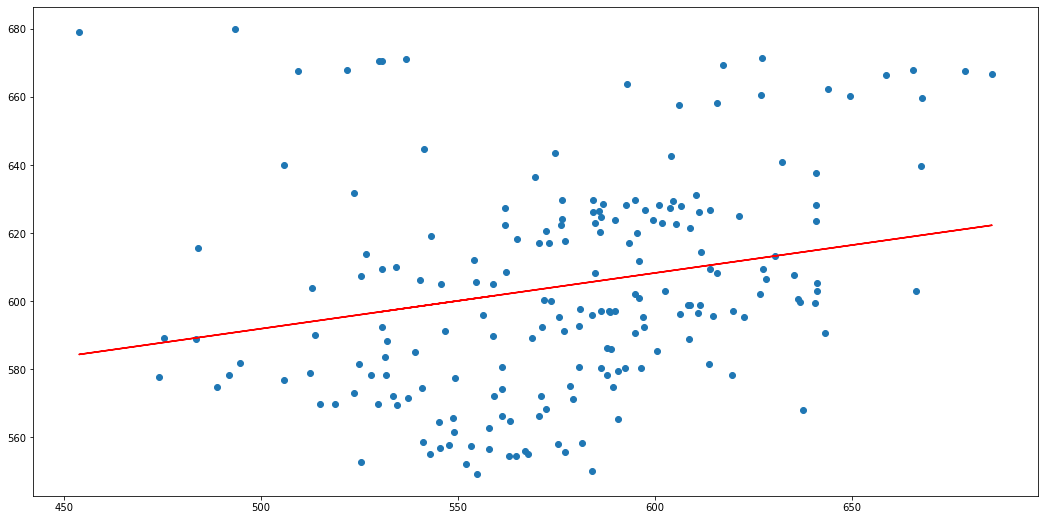

In [122]:
pypl.figure(figsize=(18,9))

pypl.scatter(x_test,y_test)
pypl.plot(x_test,y_pred,color='r')

In [123]:
f'Training score : {linreg.score(x_train,y_train)}'

'Training score : 0.05305754193796264'

In [124]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)

print(f'Test score : {score}')

Test score : 0.08235472742920047


In [125]:
f'Slope : {model.coef_}'

'Slope : [[0.16371063]]'

In [126]:
f'Intercept : {model.intercept_}'

'Intercept : [510.03596726]'

### We can see that for thermal power we have very low test score. Hence we need more data for making any prediction about thermal power generation

# 5. KNN Regression for Hydro Power

In [128]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

In [129]:
x1 = mean_hydro[['Hydro Generation Estimated']].values
y1 = mean_hydro[['Hydro Generation Actual']].values

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [130]:
# Finding the optimal value of K

results = []

for k in range(1, 40):
    knn_p2 = KNeighborsRegressor(n_neighbors=k).fit(x1_train, y1_train)
    results.append({
        'k': k,
        'RMSE': round(mean_squared_error(y1_test, knn_p2.predict(x1_test)) ** 0.5, 4)
                })

# Convert results to a pandas data frame

results = pd.DataFrame(results)
print(results)

     k     RMSE
0    1  13.3972
1    2  11.0978
2    3  10.7423
3    4  10.0267
4    5  10.0531
5    6   9.8485
6    7   9.8923
7    8   9.7308
8    9   9.6503
9   10   9.6545
10  11   9.6048
11  12   9.4893
12  13   9.4875
13  14   9.4488
14  15   9.3177
15  16   9.3769
16  17   9.3821
17  18   9.4328
18  19   9.4697
19  20   9.4385
20  21   9.3849
21  22   9.3854
22  23   9.3844
23  24   9.4191
24  25   9.3590
25  26   9.3765
26  27   9.3862
27  28   9.3259
28  29   9.3237
29  30   9.3252
30  31   9.3218
31  32   9.3135
32  33   9.3383
33  34   9.3586
34  35   9.3446
35  36   9.3232
36  37   9.3029
37  38   9.2865
38  39   9.2796


In [131]:
# Training the k-NN model on training data
# Choosing k=19

knn_p = KNeighborsRegressor(n_neighbors=19).fit(x1_train, y1_train)
predicted_y_training = knn_p.predict(x1_train)

In [132]:
# Finding the RMSE value

print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(y1_train, predicted_y_training) ** 0.5, 4))

Root Mean Squared Error (RMSE):  9.2667


In [133]:
# Testing k-NN model on test data

predicted_y_test = knn_p.predict(x1_test)

print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(x1_test, predicted_y_test) ** 0.5, 4))

Root Mean Squared Error (RMSE):  9.9802


In [134]:
f'Training score : {knn_p.score(x1_train,y1_train)}'

'Training score : 0.8569259993924516'